In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cpu'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),                                
])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 135258348.77it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 80595937.34it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 61631270.58it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11795993.05it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
num_batches = 100

In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=num_batches, shuffle=True)

In [7]:
train_iter = iter(train_dataloader)

In [9]:
# imgs, labels = train_iter.next()
imgs, labels = next(train_iter)

In [10]:
imgs.size()

torch.Size([100, 1, 28, 28])

In [11]:
img = imgs[0]

In [12]:
img_arr = img.permute(1, 2, 0).numpy()

In [13]:
img_arr.shape

(28, 28, 1)

<Axes: >

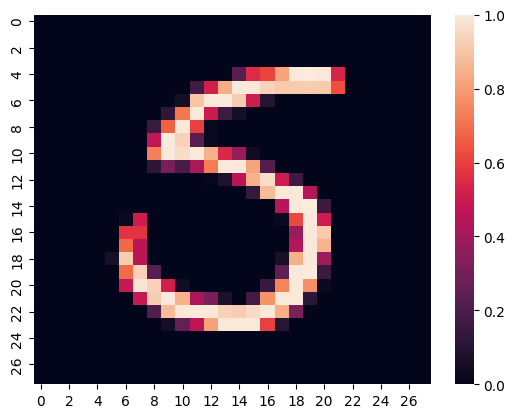

In [14]:
sns.heatmap(img_arr[:, :, 0])

In [15]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(inplace=True),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 100),
            nn.ReLU(inplace=True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        output = self.classifier(x)
        return output

In [16]:
model = MLP()
model.to(device)

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
num_epochs = 15
losses = []
accs = []
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0
    for imgs, labels in train_dataloader:
        imgs = imgs.view(num_batches, -1)
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float())
        loss.backward()
        optimizer.step()
    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    print("epoch: {}, loss: {}, acc: {}".format(epoch, running_loss, running_acc))
    losses.append(running_loss)
    # accs.append(running_acc)
    accs.append(running_acc.cpu())

epoch: 0, loss: 0.31178668851032854, acc: 0.9062836766242981
epoch: 1, loss: 0.11198233558796346, acc: 0.9656330347061157
epoch: 2, loss: 0.07024257950096702, acc: 0.9781652092933655
epoch: 3, loss: 0.05232145684751837, acc: 0.9831986427307129
epoch: 4, loss: 0.03779370278042431, acc: 0.9879651069641113
epoch: 5, loss: 0.03173856112989597, acc: 0.9900988936424255
epoch: 6, loss: 0.024989354139494633, acc: 0.9917320609092712
epoch: 7, loss: 0.022501674317706298, acc: 0.9926649928092957
epoch: 8, loss: 0.01858428032535206, acc: 0.9940990209579468
epoch: 9, loss: 0.01603207677218355, acc: 0.9946317672729492
epoch: 10, loss: 0.017866621992228222, acc: 0.9938154220581055
epoch: 11, loss: 0.010701766134431334, acc: 0.9965152740478516
epoch: 12, loss: 0.012346334067230296, acc: 0.9958152174949646
epoch: 13, loss: 0.01398572985796515, acc: 0.9954318404197693
epoch: 14, loss: 0.008632548522997847, acc: 0.9971322417259216


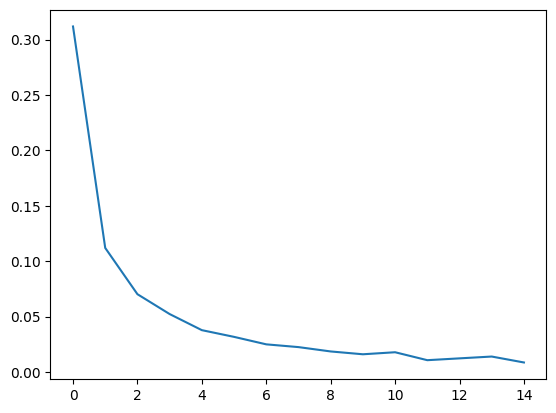

In [19]:
plt.plot(losses)

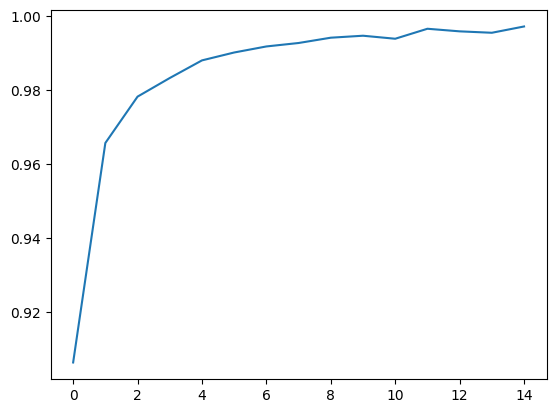

In [20]:
plt.plot(accs)

In [21]:
train_iter = iter(train_dataloader)

In [22]:
# imgs, labels = train_iter.next()
imgs, labels = next(train_iter)

In [23]:
labels

tensor([5, 4, 0, 8, 1, 4, 6, 8, 1, 7, 5, 9, 2, 0, 7, 6, 7, 1, 6, 5, 5, 0, 0, 5,
        9, 9, 0, 8, 2, 3, 5, 1, 8, 6, 6, 1, 9, 5, 6, 4, 7, 8, 7, 5, 8, 7, 5, 3,
        9, 2, 0, 9, 2, 2, 6, 4, 0, 3, 3, 0, 2, 3, 2, 8, 9, 2, 6, 9, 2, 5, 8, 8,
        1, 2, 0, 9, 3, 9, 2, 4, 4, 8, 9, 4, 1, 2, 2, 3, 6, 7, 9, 1, 1, 5, 4, 8,
        3, 5, 6, 4])

In [24]:
img_gpu = imgs.view(100, -1).to(device)

In [25]:
output = model(img_gpu)

In [26]:
torch.argmax(output, dim=1)

tensor([5, 4, 0, 8, 1, 4, 6, 8, 1, 7, 5, 9, 2, 0, 7, 6, 7, 1, 6, 5, 5, 0, 0, 5,
        9, 9, 0, 8, 2, 3, 5, 1, 8, 6, 6, 1, 9, 5, 6, 4, 7, 8, 7, 5, 8, 7, 5, 3,
        9, 2, 0, 9, 2, 2, 6, 4, 0, 3, 3, 0, 2, 3, 2, 8, 9, 2, 6, 9, 2, 5, 8, 8,
        1, 2, 0, 9, 3, 9, 2, 4, 4, 8, 9, 4, 1, 2, 2, 3, 6, 7, 9, 1, 1, 5, 4, 8,
        3, 5, 6, 4])

In [27]:
model.to("cpu")

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=400, out_features=200, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [28]:
params = model.state_dict()

In [29]:
torch.save(params, "model.prm")

In [ ]:
!ls

data  model.prm  sample_data


In [ ]:
params_load = torch.load("model.prm")

In [ ]:
model.load_state_dict(params_load)

<All keys matched successfully>